Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


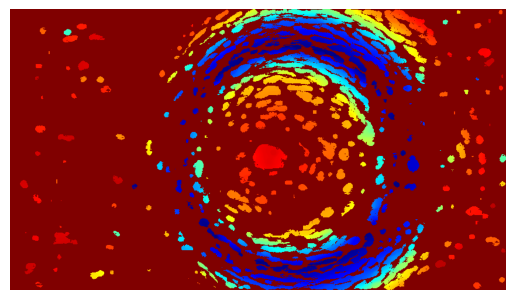

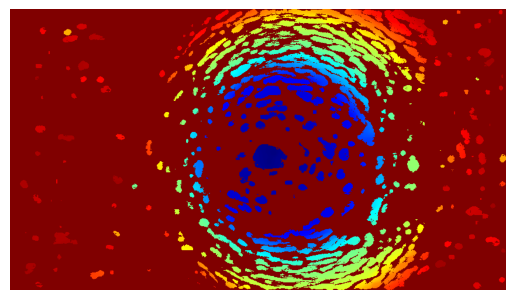

In [1]:
import sys
import os
import logging

SCRIPT_DIR = os.getcwd()
REPO_DIR = os.path.dirname(SCRIPT_DIR)
sys.path.append(REPO_DIR)

from utils import FileManager
from frame import Frame
from visualizer import ImageVisualizer, generic_o3d_vis

RUN_DIR_PATH = os.path.join(REPO_DIR, "sample_data", "run_01")

if __name__ == "__main__":
    fm = FileManager(RUN_DIR_PATH)
    imgvis = ImageVisualizer()

    idx = 0

    pair = fm.get_pair(idx)
    frame = Frame(
        frame_idx=idx,
        depth_path=pair.depth_path,
        color_path=pair.color_path,
        raw_timestamp=pair.raw_timestamp,
        recording_time_str=pair.recording_time_str
    )
    
    raw_depth_img = frame.all_pixels.create_raw_depth_img()
    raw_pcd = frame.all_pixels.create_raw_pcd()
    generic_o3d_vis(raw_pcd)

    depth_corrected_depth_img = frame.all_pixels.create_depth_corrected_depth_img()

    imgvis.depth(raw_depth_img)
    imgvis.depth_corrected(depth_corrected_depth_img)

    raw_pcd = frame.all_pixels.create_depth_corrected_pcd()
    generic_o3d_vis(raw_pcd)

    filtered_pcd = frame._filter_pixels(199, 149).create_depth_corrected_pcd()
    generic_o3d_vis(filtered_pcd)
